# Relative Änderung Sommerfest

In [1]:
from __future__ import unicode_literals
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sys
import datetime
import enum
import common.chat
import common.live

In [2]:
#config
#reload(sys)
#sys.setdefaultencoding('utf-8')
matplotlib.style.use('ggplot')
#%matplotlib inline

#constants
CHAT_DATA_DIRECTORY = '/home/marcel/Development/rbtvdata/chat'
LIVE_DATA_DIRECTORY = '/home/marcel/Development/rbtvdata/live'

class ComparisonType:
    week, week_no_weekend, weekday = range(3)

## Chat Daten

In [3]:
#load chat data
chat = common.chat.load(CHAT_DATA_DIRECTORY)

#create additional column
chat['day'] = chat.index.strftime('%Y-%m-%d')

chat

,username,message,day
datetime,,,
2015-08-05 02:00:09,tadloss,!sendeplan,2015-08-05
2015-08-05 02:00:09,moobot,Angaben zum aktuellen Programm findet Ihr: Auf...,2015-08-05
2015-08-05 02:00:10,dersendeplan,@tadloss (01:00) Blue Estate >> (02:30) Darkes...,2015-08-05
2015-08-05 02:00:17,dedalos_stormbring,"@Gunvolf, Brav. Kappa",2015-08-05
2015-08-05 02:00:18,unclesreefermadness,ist da nicht schmatzen gäng und ein kompliment,2015-08-05
2015-08-05 02:00:29,unclesreefermadness,+ing,2015-08-05
2015-08-05 02:00:29,nutsdo,Unclesreefermadness ich glaube schon,2015-08-05
2015-08-05 02:00:32,gunvolf,@nutsdo du bist odstun,2015-08-05
2015-08-05 02:00:36,unclesreefermadness,könnte auch ein klischee sein^^,2015-08-05


In [4]:
#filter chat data by date
chatFiltered = chat

#group chat data by date
chatGrouped = chatFiltered.groupby('day')

#count messages
chatMessages = chatGrouped.size().to_frame('messages')

#adjust data type
chatMessages = chatMessages.set_index(pd.to_datetime(chatMessages.index, format='%Y-%m-%d'))

#resample
chatMessages = chatMessages.resample('1D').mean().fillna(float('NaN'))

chatMessages

,messages
day,
2015-08-05,74921.0
2015-08-06,59003.0
2015-08-07,71043.0
2015-08-08,64954.0
2015-08-09,30041.0
2015-08-10,19528.0
2015-08-11,32905.0
2015-08-12,35466.0
2015-08-13,35096.0


In [5]:
#filter chat data by date
chatFiltered = chat

#group messages by date
chatGrouped = chatFiltered.groupby('day')

#count (unique) users
chatParticipants = chatGrouped.agg({'username': pd.Series.nunique})
chatParticipants.columns = ['participants']

#adjust data type
chatParticipants = chatParticipants.set_index(pd.to_datetime(chatParticipants.index, format='%Y-%m-%d'))

#resample
chatParticipants = chatParticipants.resample('1D').mean().fillna(float('NaN'))

chatParticipants

,participants
day,
2015-08-05,8634.0
2015-08-06,6565.0
2015-08-07,6982.0
2015-08-08,6173.0
2015-08-09,3868.0
2015-08-10,2895.0
2015-08-11,4122.0
2015-08-12,4232.0
2015-08-13,3980.0


## Live Daten
___

In [6]:
#load live data
live = common.live.load(LIVE_DATA_DIRECTORY)

#create additional column
live['day'] = live.index.strftime('%Y-%m-%d')

In [7]:
#filter live data by date
liveFiltered = live

#group live data by date
liveGrouped = liveFiltered.groupby('day')

#calculate mean for each day
liveMean = liveGrouped.apply(lambda group: group['viewers'].mean())
liveMean = liveMean.to_frame('viewers')

#adjust data type
liveMean = liveMean.set_index(pd.to_datetime(liveMean.index, format='%Y-%m-%d'))

liveMean

,viewers
day,
2015-01-15,39952.809155
2015-01-16,15516.815972
2015-01-17,10779.276811
2015-01-18,9721.064583
2015-01-19,9326.186453
2015-01-20,10493.045326
2015-01-21,12030.206944
2015-01-22,11261.631944
2015-01-23,10431.520139


## Auswertung 
___


Sommerfest 2015

=== data ===
                viewers  messages  participants
2015-08-17  3681.306250   31426.0        3731.0
2015-08-18  4172.979861   33824.0        3621.0
2015-08-19  4941.304861   42838.0        5806.0
2015-08-20  4618.811024   38265.0        4267.0
2015-08-21  3626.663194   31230.0        3631.0
2015-08-24  3790.618056   33966.0        3553.0
2015-08-25  4044.736806   34056.0        3837.0
2015-08-26  4342.487500   36666.0        4069.0
2015-08-27  3915.967361   28220.0        3319.0
2015-08-28  5614.568750   51123.0        4954.0

=== mean ===
viewers          4274.944366
messages        36161.400000
participants     4078.800000
dtype: float64

=== median ===
viewers          4108.858333
messages        34011.000000
participants     3784.000000
dtype: float64

=== change ===
              viewers   messages  participants
2015-08-17 -13.886452 -13.095179     -8.527018
2015-08-18  -2.385166  -6.463798    -11.223889
2015-08-19  15.587583  18.463334     42.345788
201

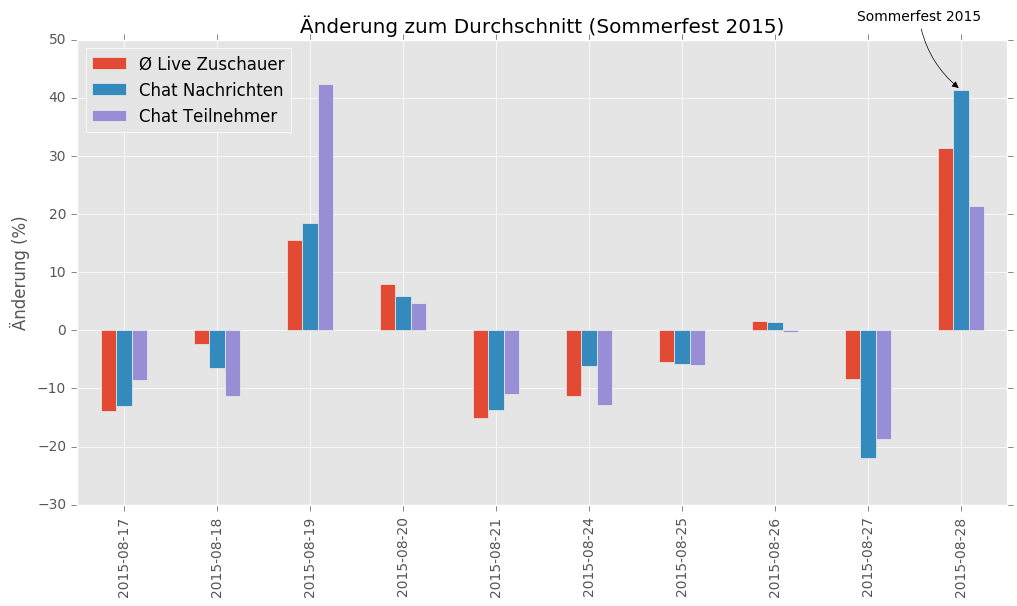

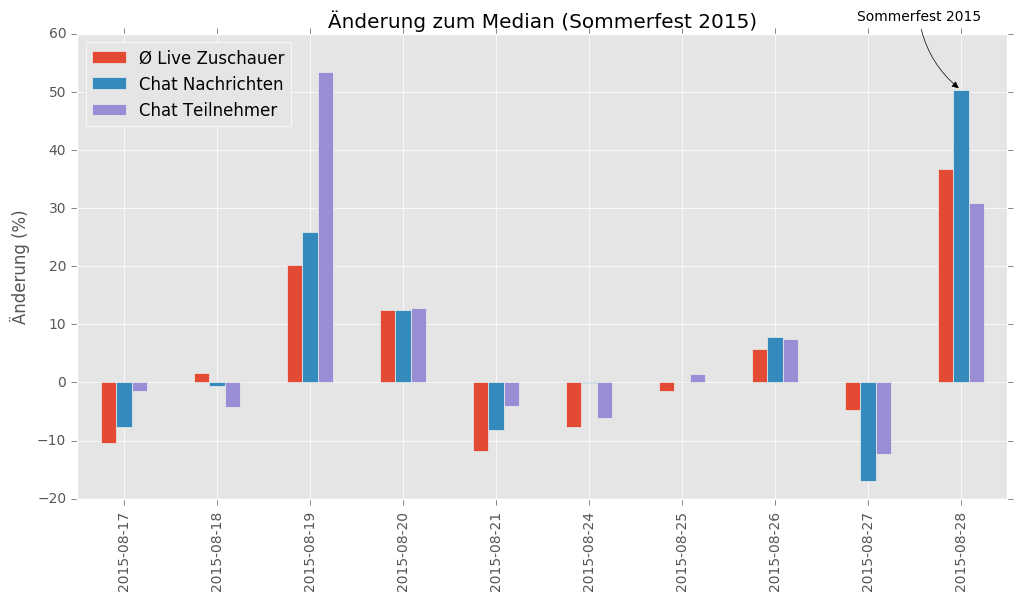


Sommerfest 2016

=== data ===
                viewers  messages  participants
2016-09-19  2735.050694   22966.0        2633.0
2016-09-20  2724.169444   28772.0        3716.0
2016-09-21  2509.134722   30379.0        3449.0
2016-09-22  2677.770833   23233.0        2431.0
2016-09-23  2290.979167   17102.0        1823.0
2016-09-26  2483.983333   21443.0        2568.0
2016-09-27  2632.225000   39320.0        4574.0
2016-09-28  2492.128472   30331.0        2938.0
2016-09-29  2530.177778   21853.0        2236.0
2016-09-30  2778.894444   31231.0        3134.0

=== mean ===
viewers          2585.451389
messages        26663.000000
participants     2950.200000
dtype: float64

=== median ===
viewers          2581.201389
messages        26002.500000
participants     2785.500000
dtype: float64

=== change ===
              viewers   messages  participants
2016-09-19   5.786197 -13.865657    -10.751813
2016-09-20   5.365332   7.909838     25.957562
2016-09-21  -2.951773  13.936916     16.907328
201

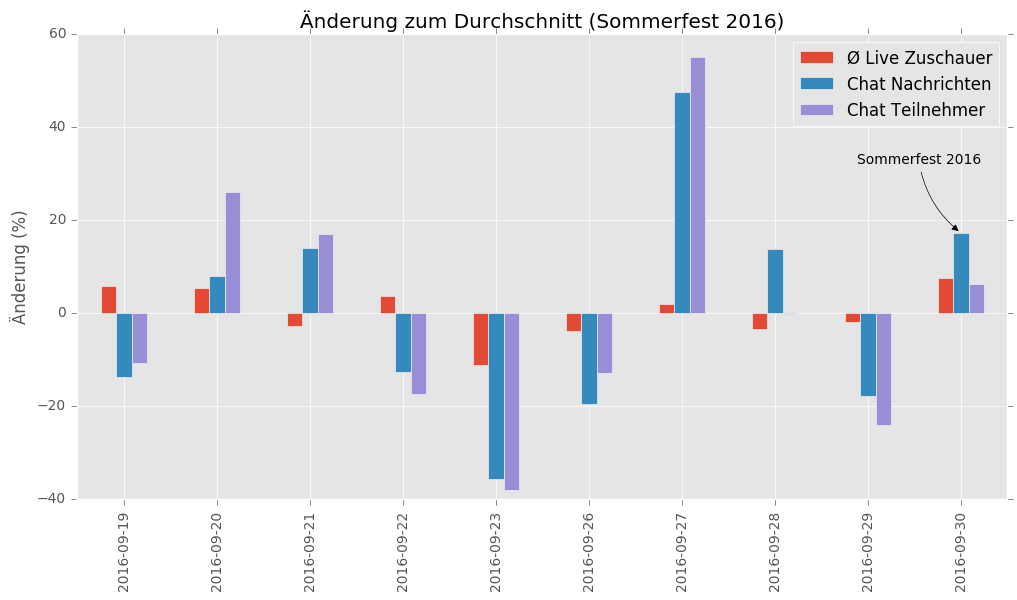

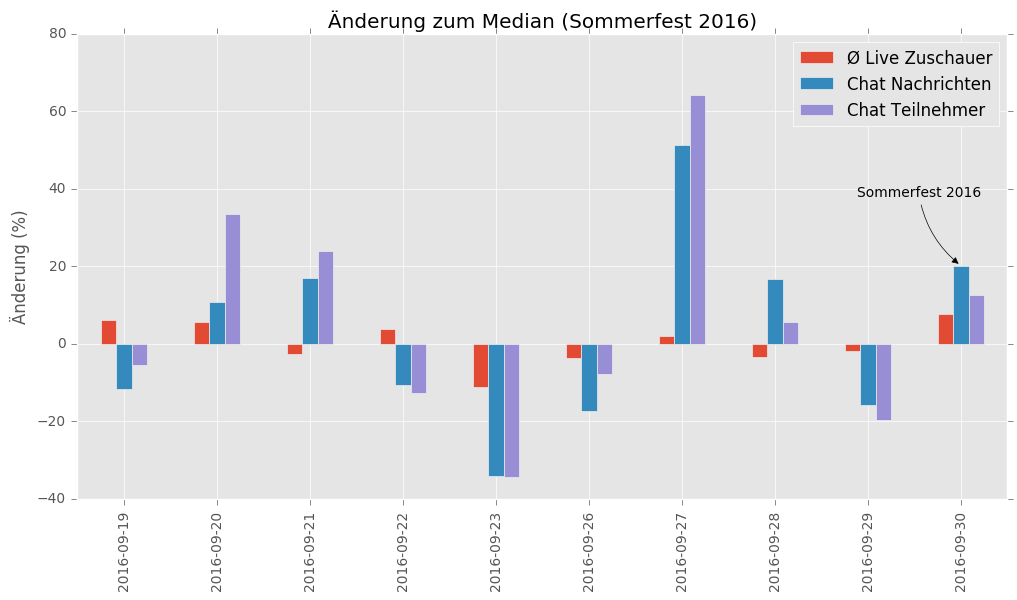

In [8]:
shows = [{
    'name': 'Sommerfest 2015',
    'date': datetime.datetime(2015, 8, 28)
}, {
    'name': 'Sommerfest 2016',
    'date': datetime.datetime(2016, 9, 30)
}]
spanLeft = 1
spanRight = 0
comparison = ComparisonType.week_no_weekend

#join data
joinedData = liveMean.join(chatMessages).join(chatParticipants)

#create additional columns
joinedData['weekday'] = joinedData.index.dayofweek

for show in shows:
    #filter by date
    startDay = show['date'] + datetime.timedelta(days=-show['date'].weekday(), weeks=-spanLeft)
    endDay = show['date'] + datetime.timedelta(days=6 - show['date'].weekday(), weeks=spanRight)
    joinedDataFiltered = joinedData.loc[startDay : endDay]

    #filter by comparison type
    if comparison == ComparisonType.week:
        #no additional filter necessary
        pass
    elif comparison == ComparisonType.week_no_weekend:
        workingDays = range(0,5)
        joinedDataFiltered = joinedDataFiltered[joinedDataFiltered['weekday'].isin(workingDays)]
    elif comparison == ComparisonType.weekday:
        joinedDataFiltered = joinedDataFiltered[joinedDataFiltered['weekday'] == show['date'].weekday()]

        #adjust data type
    joinedDataFiltered = joinedDataFiltered.set_index(joinedDataFiltered.index.date)

    #remove columns
    joinedDataFiltered.drop('weekday', axis=1, inplace=True)

    #calculate mean
    joinedDataMean = joinedDataFiltered.mean()

    #calculate median
    joinedDataMedian = joinedDataFiltered.median()

    #calculate change (mean)
    joinedDataChangeMean = 100 * ((joinedDataFiltered / joinedDataMean) - 1)

    #calculate change (median)
    joinedDataChangeMedian = 100 * ((joinedDataFiltered / joinedDataMedian) - 1)

    #output
    print('\n====================================================')
    print(show['name'])
    print('\n=== data ===')
    print(joinedDataFiltered)
    print('\n=== mean ===')
    print(joinedDataMean)
    print('\n=== median ===')
    print(joinedDataMedian)
    print('\n=== change ===')
    print(joinedDataChangeMean)

    #change (mean)
    plot = joinedDataChangeMean.plot(kind='bar', figsize=(12, 6), title='Änderung zum Durchschnitt (%s)' % show['name'])
    plot.set_xlabel('')
    plot.set_ylabel('Änderung (%)')

    date = show['date'].date()
    datapoint = joinedDataChangeMean.loc[date]
    x = joinedDataChangeMean.index.get_loc(date)
    y = datapoint.max()
    xText = 5 * len(show['name'])
    plot.annotate(show['name'], 
                  xy=(x, y), xycoords='data', 
                  xytext=(-xText, 50), textcoords='offset points',
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle='arc3,rad=0.2',
                                  linewidth = 0.5,
                                  color = 'black'))

    legend = plot.legend(loc=0)
    legend.get_texts()[0].set_text('Ø Live Zuschauer')
    legend.get_texts()[1].set_text('Chat Nachrichten')
    legend.get_texts()[2].set_text('Chat Teilnehmer')

    plt.show()
    
    #change (median)
    plot = joinedDataChangeMedian.plot(kind='bar', figsize=(12, 6), title='Änderung zum Median (%s)' % show['name'])
    plot.set_xlabel('')
    plot.set_ylabel('Änderung (%)')

    date = show['date'].date()
    datapoint = joinedDataChangeMedian.loc[date]
    x = joinedDataChangeMedian.index.get_loc(date)
    y = datapoint.max()
    xText = 5 * len(show['name'])
    plot.annotate(show['name'], 
                  xy=(x, y), xycoords='data', 
                  xytext=(-xText, 50), textcoords='offset points',
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle='arc3,rad=0.2',
                                  linewidth = 0.5,
                                  color = 'black'))

    legend = plot.legend(loc=0)
    legend.get_texts()[0].set_text('Ø Live Zuschauer')
    legend.get_texts()[1].set_text('Chat Nachrichten')
    legend.get_texts()[2].set_text('Chat Teilnehmer')

    plt.show()